In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Now lets look at the default featureset that comes with GTZAN
1000 rows --> 10 genres * 100 songs. Each row has 60 features. Features are mostly the same as the extracted information in 'audiofilefun' notebook

In [5]:
mainPath = "/Users/nicholas/Desktop/Misc/Workspace/PythonWorkspace/musicProject/musicdata"
data = pd.read_csv(f'{mainPath}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Good Practice to do a Correlation Heatmap
#### Just to make it simpler we'll only look at all the mean data

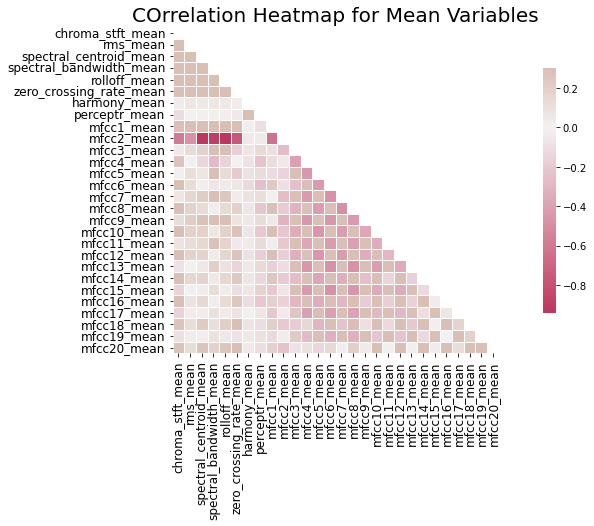

In [19]:
# Get correlation matrix
mean_cols = [col for col in data.columns if 'mean' in col] # only take columns if its a mean on something
corr = data[mean_cols].corr() # compute correlation of 'mean' columns using pandas

# for proper looking heatmap get rid of top half
# creates an array the same size as data, each value to be masked is True, each to be kept is False. 
# Applied with seaborn
topMask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(16,6))

cmap = sns.diverging_palette(0, 25, as_cmap=True, l=45, n=5)

# draw heatmap with seaborn
sns.heatmap(corr, mask=topMask, cmap=cmap, vmax=.3, center=0, square=True, 
            linewidths=.7, cbar_kws={"shrink": .75});

# fix axis titles
plt.title("COrrelation Heatmap for Mean Variables", fontsize=20)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

Text(0, 0.5, 'Rolloff')

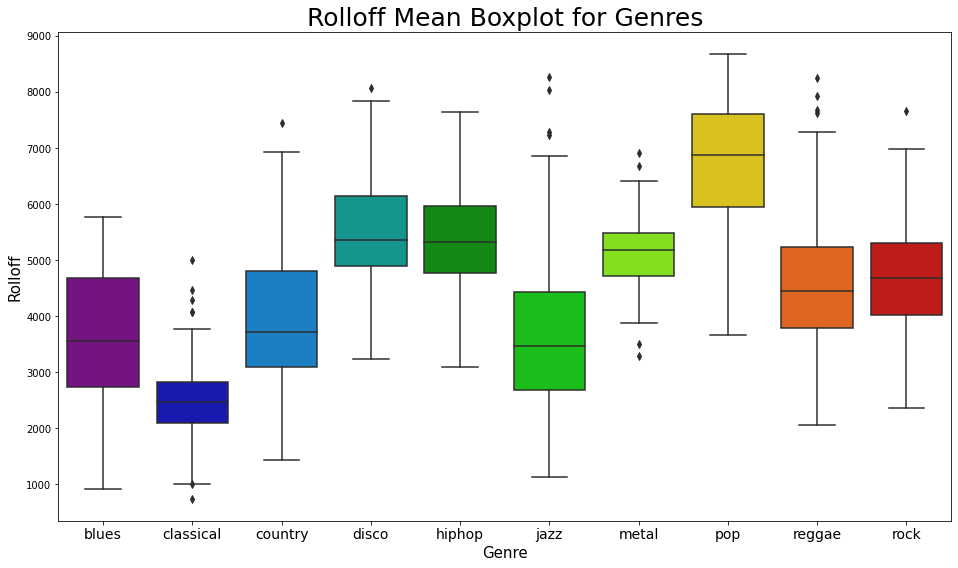

In [38]:
x = data[["label", "rolloff_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "rolloff_mean", data = x, palette = 'nipy_spectral');

plt.title('Rolloff Mean Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Rolloff", fontsize = 15)

### Making a Neural Net that can be used to classify ANY song into a genre